In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [9]:
import seaborn as sn

### Data loading

In [93]:
# Curb extraction data
preda = pd.read_csv('/home/yelhe/script/mt/output/pred_accident_label.csv')
predp = pd.read_csv('/home/yelhe/script/mt/output/pred_pseudo_label.csv')

In [43]:
nla = pd.read_csv('/home/yelhe/script/mt/output/n_accident.txt', header=None)

In [48]:
nla.rename(columns = {0:'Nr'}, inplace = True)
nla['Nr'] = nla['Nr'].values.astype(str)
nla['id'] = nla['Nr'].str[-15:-1]
nla['dir'] = nla['Nr'].str[-1]

In [50]:
nla1 = nla[['id', 'dir']]

In [52]:
nla2 = nla1
nla3 = nla1
nla4 = nla1
nla2 = nla2.assign(dir = '2')
nla3 = nla3.assign(dir = '3')
nla4 = nla4.assign(dir = '4')

In [88]:
nlas = pd.concat([nla1, nla2, nla3, nla4])

In [90]:
nlas['Nr'] = nlas['id'] + nlas['dir']

In [104]:
nlas0 = nlas
nlas1 = nlas
nlas2 = nlas
nlas3 = nlas
nlas0 = nlas0.assign(p = '0')
nlas1 = nlas1.assign(p = '1')
nlas2 = nlas2.assign(p = '2')
nlas3 = nlas3.assign(p = '3')

In [105]:
nlass = pd.concat([nlas0, nlas1, nlas2, nlas3])

In [106]:
nlass

,id,dir,Nr,p
0,99900060852597,1,999000608525971,0
1,99900063018611,1,999000630186111,0
2,99900052723510,1,999000527235101,0
3,99900061514043,1,999000615140431,0
4,99900063037843,1,999000630378431,0
...,...,...,...,...
290,99900056387598,4,999000563875984,3
291,99900055999694,4,999000559996944,3
292,99900055905276,4,999000559052764,3
293,99900060670975,4,999000606709754,3


In [108]:
nlass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4720 entries, 0 to 294
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4720 non-null   object
 1   dir     4720 non-null   object
 2   Nr      4720 non-null   object
 3   p       4720 non-null   object
dtypes: object(4)
memory usage: 184.4+ KB


In [111]:
preda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nr      3146 non-null   object
 1   p       3146 non-null   object
 2   count   3146 non-null   int64 
 3   id      3146 non-null   object
 4   dir     3146 non-null   object
dtypes: int64(1), object(4)
memory usage: 123.0+ KB


In [94]:
preda = preda[['Nr', 'p']]

In [95]:
preda = preda.groupby(['Nr', 'p']).size().reset_index().rename(columns={0:'count'})


In [110]:
preda['p'] = preda['p'].values.astype(str)

In [96]:
preda['Nr'] = preda['Nr'].values.astype(str)
preda['id'] = preda['Nr'].str[-15:-1]
preda['dir'] = preda['Nr'].str[-1]

In [119]:
pa = nlass.merge(preda, how = 'left', on = ['id', 'Nr', 'dir', 'p'])

In [126]:
pa = pa.sort_values(by = ['id', 'dir', 'p'], ignore_index = True)

In [121]:
pa = pa.fillna(0)

In [128]:
pa.to_csv('/home/yelhe/script/mt/output/predlabel_accident_count.csv', index = False)

In [129]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      4720 non-null   object 
 1   dir     4720 non-null   object 
 2   Nr      4720 non-null   object 
 3   p       4720 non-null   object 
 4   count   4720 non-null   float64
dtypes: float64(1), object(4)
memory usage: 184.5+ KB


In [130]:
pac = pa.loc[pa['p'] == '0']

In [138]:
pacc = pac.groupby(['id'])['count'].sum().reset_index().rename(columns = {'count':'sum'})

In [141]:
pacc.to_csv('/home/yelhe/script/mt/output/predcurb_accident_count_sum.csv', index = False)

(array([963.,   0., 168.,   0.,  40.,   0.,   7.,   0.,   1.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

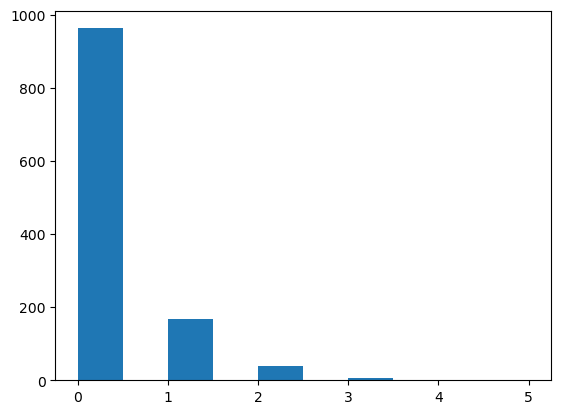

In [135]:
plt.hist(pacc['sum'])

(array([963.,   0., 168.,   0.,  40.,   0.,   7.,   0.,   1.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

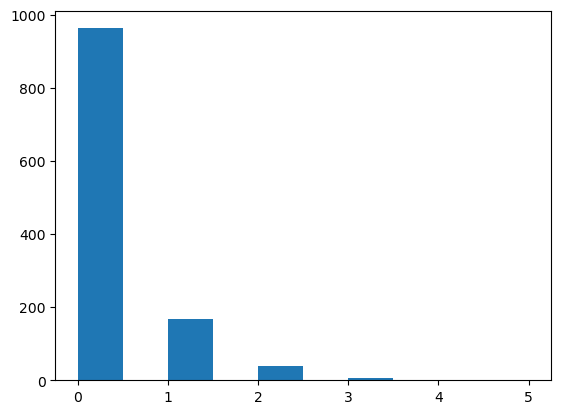

In [132]:
plt.hist(pac['count'])